In [182]:
import pandas as pd
import numpy as np
import json

In [183]:
with open('data/train_no_dup.json') as file: 
    data = json.load(file)

In [362]:
iterables = []
item_prices = []
item_names = [] 
item_catids = []

for index, d in enumerate(data): 
    outfit = []
    items = [i for i in d["items"]]
    
    for i_index, i in enumerate(items): 
        #outfit.append([d["name"], [i["name"], i["price"], i["categoryid"]]])
        iterables.append([index, i_index])
        item_names.append(i["name"])
        item_prices.append(i["price"])
        item_catids.append(i["categoryid"])
    

In [368]:
iterables

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [4, 5],
 [4, 6],
 [4, 7],
 [5, 0],
 [5, 1],
 [5, 2],
 [5, 3],
 [5, 4],
 [5, 5],
 [6, 0],
 [6, 1],
 [6, 2],
 [6, 3],
 [6, 4],
 [6, 5],
 [6, 6],
 [7, 0],
 [7, 1],
 [7, 2],
 [7, 3],
 [7, 4],
 [7, 5],
 [8, 0],
 [8, 1],
 [8, 2],
 [8, 3],
 [8, 4],
 [8, 5],
 [9, 0],
 [9, 1],
 [9, 2],
 [9, 3],
 [9, 4],
 [9, 5],
 [9, 6],
 [9, 7],
 [10, 0],
 [10, 1],
 [10, 2],
 [10, 3],
 [10, 4],
 [10, 5],
 [10, 6],
 [10, 7],
 [11, 0],
 [11, 1],
 [11, 2],
 [11, 3],
 [11, 4],
 [11, 5],
 [11, 6],
 [12, 0],
 [12, 1],
 [12, 2],
 [12, 3],
 [12, 4],
 [12, 5],
 [13, 0],
 [13, 1],
 [13, 2],
 [13, 3],
 [13, 4],
 [13, 5],
 [14, 0],
 [14, 1],
 [14, 2],
 [14, 3],
 [14, 4],
 [14, 5],
 [14, 6],
 [14, 7],
 [15, 0],
 [15, 1],


In [369]:
print(len(item_prices), len(item_names), len(item_catids))

114806 114806 114806


In [370]:
multindex = pd.DataFrame(iterables, columns=["outfit_index", "item_index"])
index = pd.MultiIndex.from_frame(multindex)
index

MultiIndex([(    0, 0),
            (    0, 1),
            (    0, 2),
            (    0, 3),
            (    0, 4),
            (    0, 5),
            (    0, 6),
            (    1, 0),
            (    1, 1),
            (    1, 2),
            ...
            (17314, 3),
            (17314, 4),
            (17314, 5),
            (17315, 0),
            (17315, 1),
            (17315, 2),
            (17315, 3),
            (17315, 4),
            (17315, 5),
            (17315, 6)],
           names=['outfit_index', 'item_index'], length=114806)

In [371]:
df = pd.DataFrame({"item_name": item_names, "item_price": item_prices, "item_catid": item_catids}, index=index)

In [372]:
df

item_name  \
outfit_index item_index                                                  
0            0                   mock neck embroidery suede sweatshirt   
             1                           luxe double zip hooded jacket   
             2             citizens humanity high rise rocket hem jean   
             3                                   suede tie short boots   
             4                            cloth travel school backpack   
...                                                                ...   
17315        2           christian louboutin kate patent-leather pumps   
             3                  jimmy choo women glitter fabric clutch   
             4                                            mac lipstick   
             5                                           ysl black edp   
             6                                                           

                         item_price  item_catid  
outfit_index item_index                          
0            0                 24.0        4495  
             1                150.0          25  
             2                248.0          27  
             3                 37.0         261  
             4                 22.0         259  
...                             ...         ...  
17315        2                565.0          43  
             3                640.0          38  
             4                 17.0         200  
             5                 84.0          95  
             6                 -1.0          11  

[114806 rows x 3 columns]

## Pre-Processing Text Into Tokens
* Remove Stop Words
* Lowercase
* Remove punctuation

In [373]:
import re 
text = ' '.join(df['item_name'].astype(str).tolist())

In [374]:
text = re.sub(r"[^A-Za-z\s]", '', text)
text = text.lower() 

In [375]:
from wordcloud import STOPWORDS

In [376]:
stopwords = set(STOPWORDS)

In [377]:
text = ' '.join(word for word in text.split() if word not in stopwords)

## Making a wordcloud to show word frequency

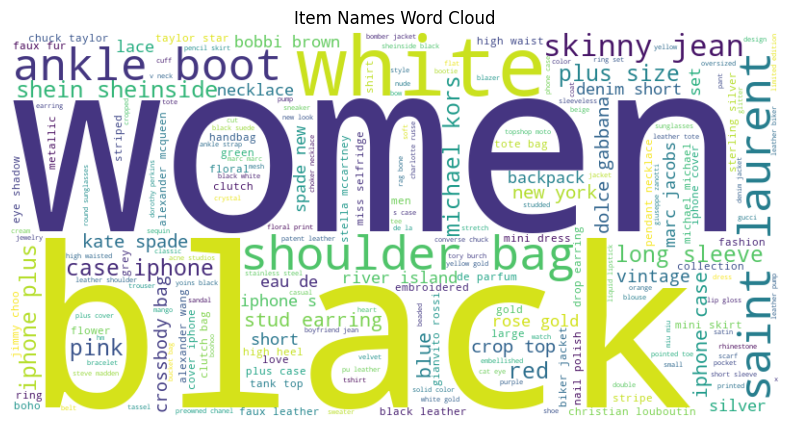

In [378]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Item Names Word Cloud')
plt.show()

Most common colors seem to be black, white, brown, silver, and gold. The training data lacks data on more vibrant clothing.

Lots of brand names: dolce gabbana, micheal kors, saint laurent, miu miu, jimmy choo

Most common words: Women, black, shoulder bag, white, and ankle boot

## Look at distribution of items across category ids

In [379]:
#df["category_name"]

with open('data/category_id.txt', 'r') as file: 
    categories = file.readlines()
    
c = [i.split(maxsplit=1) for i in categories]
values = [i[1].strip() for i in c]
keys = [(int) (i[0]) for i in c]

cat_lookup = {k:v for (k, v) in zip(keys, values)}



In [380]:
df["category_name"] = df["item_catid"].apply(lambda id: cat_lookup[id])

In [381]:
from collections import Counter
cat_counts = Counter(df["category_name"])
cat_counts = {k:v for (k,v) in cat_counts.most_common(40)}

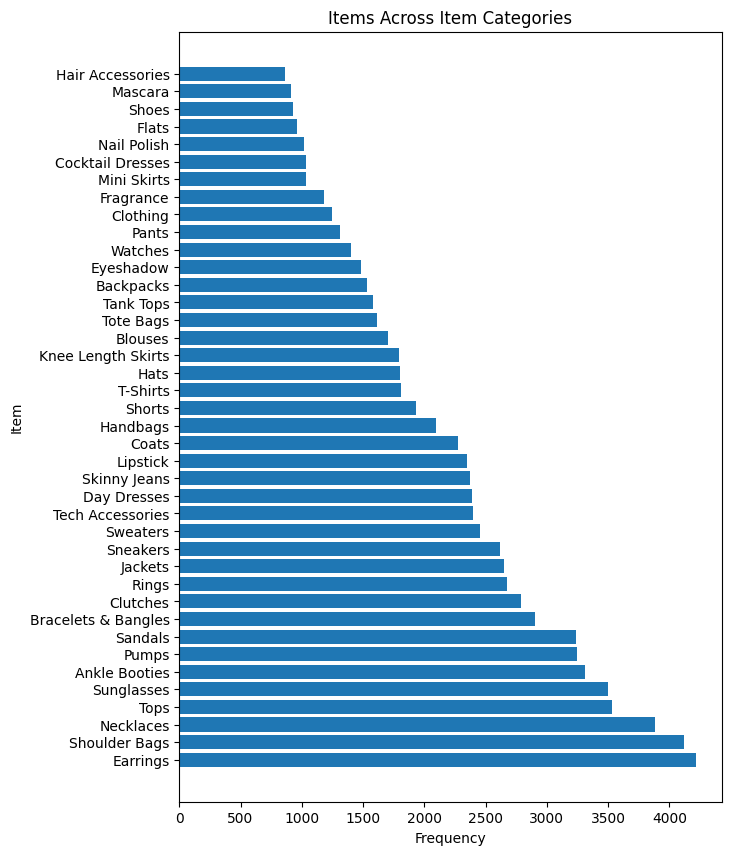

In [382]:
cat_counts
plt.figure(figsize=(7, 10))
plt.title("Items Across Item Categories")
plt.xlabel("Frequency")
plt.ylabel("Item")
plt.barh(cat_counts.keys(), cat_counts.values())
plt.show()

In [383]:
# 1. Cosine Similarity -- sample 50 outfits from the dataset (each outfit is a document) 
    ## Calculate cosine similarity between outfit items in each outfit 
    
# 2. N-grams analysis (seeing what popular word combinations are)

# 3. TF-IDF scores 

# 4. Some sort of correlation matrix with features: patterns, colors, textures

## Cosine Similarity Analysis

In [ ]:
# 1. Randomly sample items
# 2. Embed the item names with Word2Vec
# 3. Compute a cosine similarity between clothing items

# Cosine similarity across all items? Then see how likely it is for an item with high cosine similarity to be paired in an outfit? 

In [384]:
import numpy as np
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [385]:
sampled_items = df.sample(25)

In [386]:
outfit_items = sampled_items["item_name"]
outfit_items = outfit_items.to_list()

In [387]:
df["item_name"] = df["item_name"].str.replace(r"[^A-Za-z\s']", " ", regex=True)

In [388]:
df["tokenized_item"] = df["item_name"].apply(lambda x: x.split(" "))

In [389]:
df[0:50]

item_name  \
outfit_index item_index                                                      
0            0                       mock neck embroidery suede sweatshirt   
             1                               luxe double zip hooded jacket   
             2                 citizens humanity high rise rocket hem jean   
             3                                       suede tie short boots   
             4                                cloth travel school backpack   
             5                                                               
             6                                                    polyvore   
1            0                                  nirvana distressed t shirt   
             1                         rag bone rock w  black skinny jeans   
             2                          vans authentic black mono trainers   
             3                          time low rubber bracelet hot topic   
             4                                   veil logo rubber bracelet   
             5                                   rubber bracelet hot topic   
             6                                                 romance i'm   
             7           disney alice wonderland cat rubber bracelet ho...   
2            0                                               monki singlet   
             1                                            joy denim jacket   
             2                    topshop moto joni high rise skinny jeans   
             3                                 black pointed chelsea boots   
             4                               pre owned chanel shoulder bag   
             5                                 rag bone floppy brim fedora   
3            0                                                        tops   
             1           saint laurent zip cutout stretch nappa leather...   
             2           corset super store women's black steampunk corset   
             3           allurez square diamond halo engagement ring we...   
             4                      lip buckled matte womens corset lip uk   
             5                                          nude pink lipstick   
             6                                     amazing eye makeup miss   
             7                                                  latest pro   
4            0               yoins leather sexy v neck sleeveless crop top   
             1                    solid color long sleeve irregular blazer   
             2                    alice olivia floral pattern a line skirt   
             3                                   zipped top chunky booties   
             4                    gold boho turquoise leaf tassel earrings   
             5                                  etro heart locket necklace   
             6           bohemian flower mandala blue crystal clear pho...   
             7                            velvetines liquid matte lipstick   
5            0           new look light blue denim oversized long sleev...   
             1                                   mango skinny jane jegging   
             2                      sophia webster leather butterfly flats   
             3               michael michael kors mini selma crossbody bag   
             4                            velvet vase embellished necklace   
             5                               powder eye shadow deep sea ea   
6            0                           isabel marant alpaca blend jumper   
             1            yoins light blue gradient color hole denim skirt   
             2                alice light blue shoes flats leather sandals   
             3           yoins beige leather look gold tone metal clutc...   
             4                           yoins stone long pendant necklace   
             5                                          elizabeth mini set   
             6                                                               

        

In [390]:
embeddings = model.encode(outfit_items)

In [391]:
embeddings.shape

(25, 384)

In [288]:
with open("data/colors.txt", "r") as file: 
    colors = [i.strip() for i in file.readlines()]
with open("data/fabrics.txt", "r") as file:
    fabrics = [i.strip() for i in file.readlines()]
with open("data/patterns.txt", "r") as file:
    patterns = [i.strip() for i in file.readlines()]
patterns = set(patterns)
fabrics = set(fabrics)
colors = set(colors)

In [393]:
import itertools

vocab = list(itertools.chain(*list(df["tokenized_item"])))

In [394]:
len(vocab)

609611

In [395]:
vocab_set = set(vocab)

In [396]:
len(vocab_set)
#2618 x 2618 co-occurence matrix 

2618

In [407]:
outfit = df.loc[0]
outfit

,item_name,item_price,item_catid,category_name,tokenized_item
item_index,,,,,
0,mock neck embroidery suede sweatshirt,24.0,4495,Sweatshirts,"[mock, neck, embroidery, suede, sweatshirt]"
1,luxe double zip hooded jacket,150.0,25,Jackets,"[luxe, double, zip, hooded, jacket]"
2,citizens humanity high rise rocket hem jean,248.0,27,Jeans,"[citizens, humanity, high, rise, rocket, hem, ..."
3,suede tie short boots,37.0,261,Ankle Booties,"[suede, tie, short, boots]"
4,cloth travel school backpack,22.0,259,Backpacks,"[cloth, travel, school, backpack]"
5,,160.0,1967,Tech Accessories,[]
6,polyvore,-1.0,2,Clothing,[polyvore]


In [412]:
outfit_vocab = list(outfit["tokenized_item"])

In [413]:
outfit_vocab

[['mock', 'neck', 'embroidery', 'suede', 'sweatshirt'],
 ['luxe', 'double', 'zip', 'hooded', 'jacket'],
 ['citizens', 'humanity', 'high', 'rise', 'rocket', 'hem', 'jean'],
 ['suede', 'tie', 'short', 'boots'],
 ['cloth', 'travel', 'school', 'backpack'],
 [''],
 ['polyvore']]